In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

➡️ Importing the dataset

In [2]:
df = pd.read_csv('weather_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

In [4]:
df.describe()

,TempHighF,TempAvgF,TempLowF
count,1319.000000,1319.000000,1319.000000
mean,80.862775,70.642911,59.902957
std,14.766523,14.045904,14.190648
min,32.000000,29.000000,19.000000
25%,72.000000,62.000000,49.000000
50%,83.000000,73.000000,63.000000
75%,92.000000,83.000000,73.000000
max,107.000000,93.000000,81.000000


➡️ First 5 Rows in dataset

In [5]:
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [6]:
df.replace('-', np.nan, inplace=True)
df.replace('T', 0, inplace=True)

## 🌟 Data Preprocessing

➡️ Calculating the Total Null Count (in each columns)

In [7]:
df.isnull().sum()

Date                           0
TempHighF                      0
TempAvgF                       0
TempLowF                       0
DewPointHighF                  7
DewPointAvgF                   7
DewPointLowF                   7
HumidityHighPercent            2
HumidityAvgPercent             2
HumidityLowPercent             2
SeaLevelPressureHighInches     3
SeaLevelPressureAvgInches      3
SeaLevelPressureLowInches      3
VisibilityHighMiles           12
VisibilityAvgMiles            12
VisibilityLowMiles            12
WindHighMPH                    2
WindAvgMPH                     2
WindGustMPH                    4
PrecipitationSumInches         0
Events                         0
dtype: int64

➡️ Droping the Null Values

In [8]:
df = df.dropna()

➡️ Again checking for Null Values (count)

In [9]:
df.isnull().sum()

Date                          0
TempHighF                     0
TempAvgF                      0
TempLowF                      0
DewPointHighF                 0
DewPointAvgF                  0
DewPointLowF                  0
HumidityHighPercent           0
HumidityAvgPercent            0
HumidityLowPercent            0
SeaLevelPressureHighInches    0
SeaLevelPressureAvgInches     0
SeaLevelPressureLowInches     0
VisibilityHighMiles           0
VisibilityAvgMiles            0
VisibilityLowMiles            0
WindHighMPH                   0
WindAvgMPH                    0
WindGustMPH                   0
PrecipitationSumInches        0
Events                        0
dtype: int64

In [10]:
df = df.drop_duplicates()

In [11]:
# One-Hot Encode the Events column
df = pd.get_dummies(df, columns=['Events'], drop_first=True)

In [12]:
from sklearn.preprocessing import StandardScaler

# Select the numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Scale the numeric data
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [13]:

df['PrecipitationSumInches'] = df['PrecipitationSumInches'].astype(str)


➡️ Rainfall Vs Time

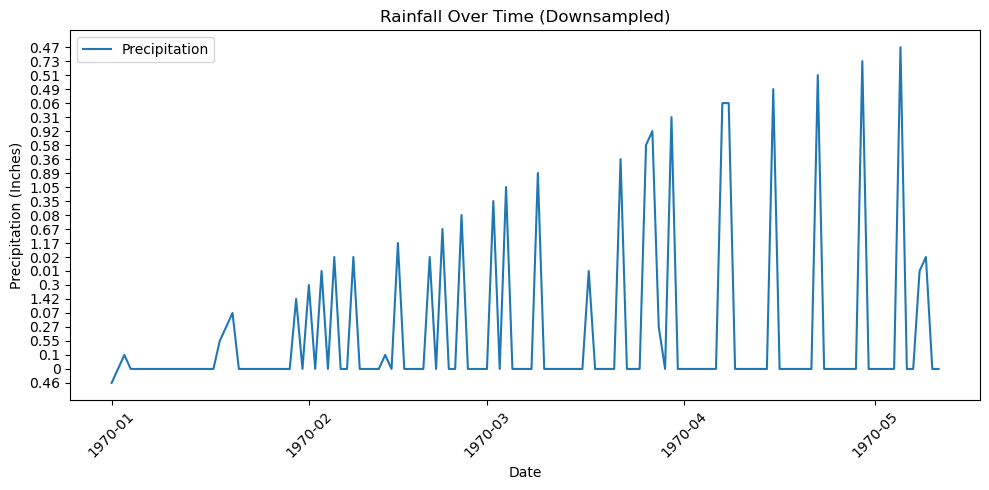

In [14]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  

downsampled_data = df.iloc[::10, :]

plt.figure(figsize=(10, 5))
plt.plot(downsampled_data['Date'], downsampled_data['PrecipitationSumInches'], label='Precipitation')

plt.title('Rainfall Over Time (Downsampled)')
plt.xlabel('Date')
plt.ylabel('Precipitation (Inches)')

# Rotate x-axis labels and format
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()

➡️ Correlation Matrix

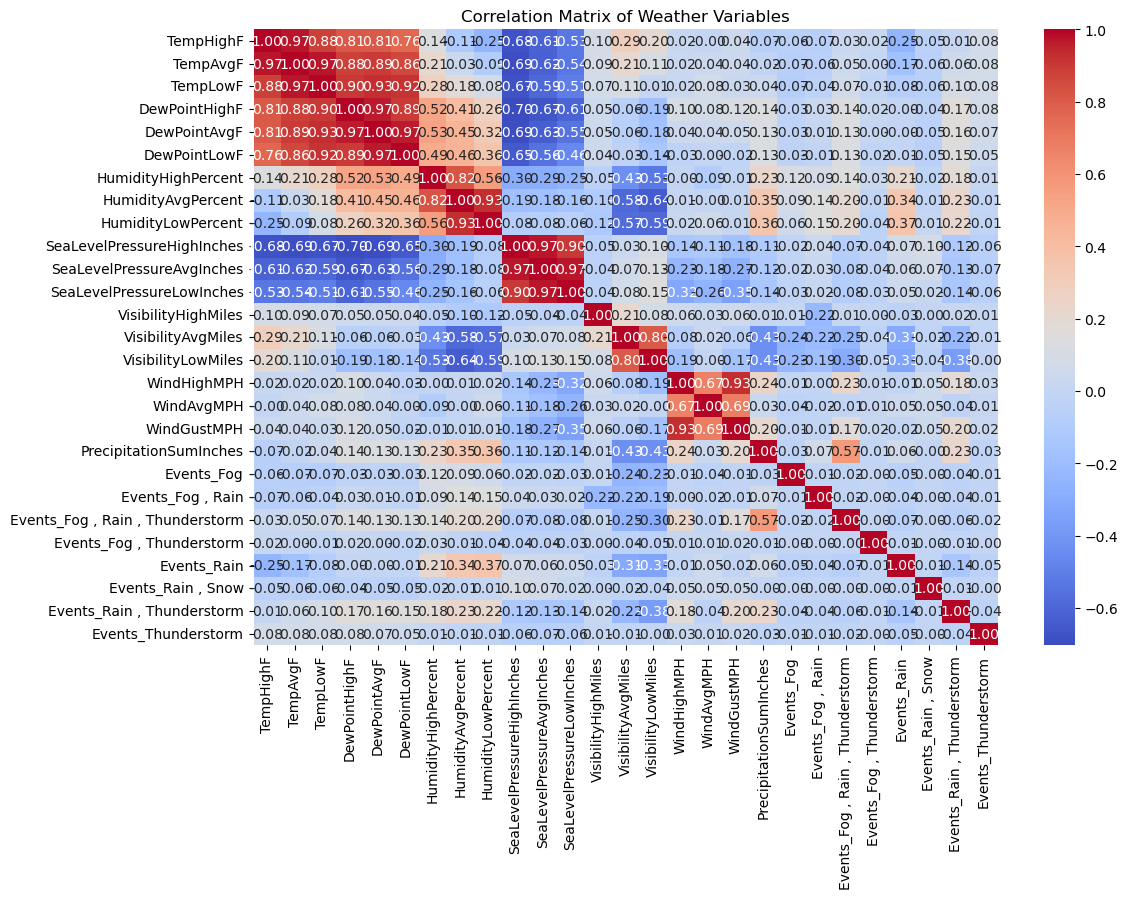

In [15]:
df = df.drop('Date', axis=1, inplace=False)
corr_matrix = df.corr()

# heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Weather Variables')
plt.show()


➡️ Precipitation (in inches)

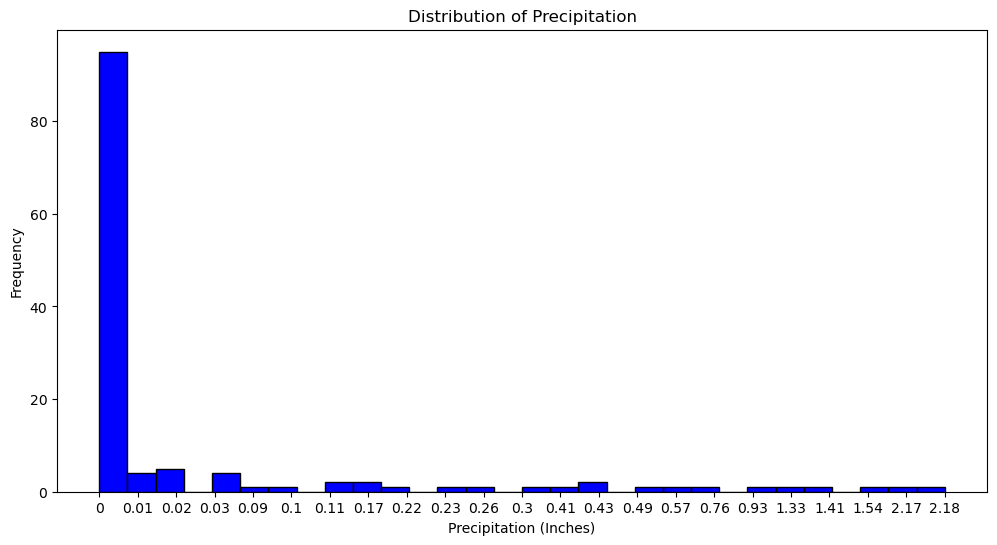

In [16]:
# Plot distribution of Precipitation

plt.figure(figsize=(12, 6))

sampled_df = df.sample(frac=0.1, random_state=42)

# Sort by PrecipitationSumInches in ascending order
sampled_df = sampled_df.sort_values(by='PrecipitationSumInches')

plt.hist(sampled_df['PrecipitationSumInches'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Precipitation')
plt.xlabel('Precipitation (Inches)')

plt.ylabel('Frequency')
plt.show()


➡️ Temprature Vs Precipitation

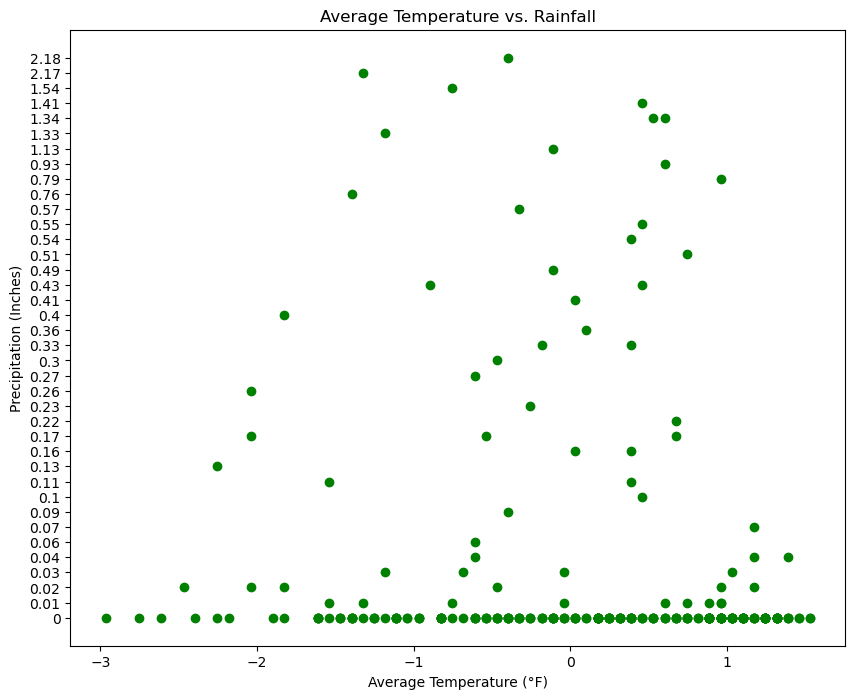

In [17]:
# Temperature vs Precipitation

# 10% of Data
sampled_df = df.sample(frac=0.2, random_state=42)

# Sort by PrecipitationSumInches in ascending order
sampled_df = sampled_df.sort_values(by='PrecipitationSumInches')

plt.figure(figsize=(10, 8))
plt.scatter(sampled_df['TempAvgF'], sampled_df['PrecipitationSumInches'], color='green')
plt.title('Average Temperature vs. Rainfall')
plt.xlabel('Average Temperature (°F)')
plt.ylabel('Precipitation (Inches)')
plt.show()

## 🌟 Linear Regression 🌟

Mean Squared Error: 0.0729550315863663
R^2 Score: 0.18704552689025333


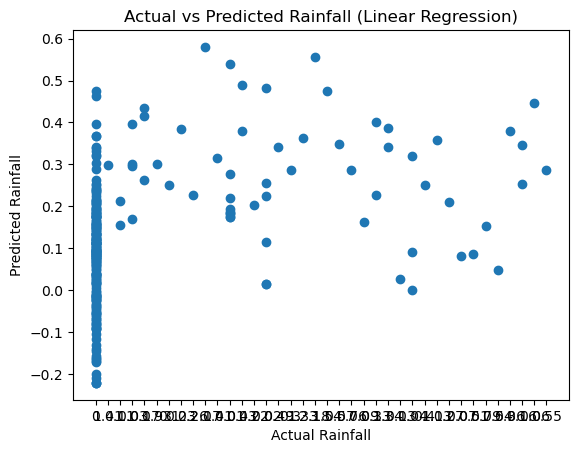

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ----------- Features (X) ---------------
X = df[['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent', 'SeaLevelPressureAvgInches', 'WindAvgMPH']]

# ---------- target variable (y) ---------
y = df['PrecipitationSumInches']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
linear_model = LinearRegression()

#  ---------- Model ------------
linear_model.fit(X_train, y_train)

# ---------- Predictions ---------
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot predicted vs actual rainfall
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
plt.title('Actual vs Predicted Rainfall (Linear Regression)')
plt.show()


## 🌟 Logarithmic Regression 🌟

Accuracy: 0.8505747126436781
Confusion Matrix:
[[189  10]
 [ 29  33]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       199
           1       0.77      0.53      0.63        62

    accuracy                           0.85       261
   macro avg       0.82      0.74      0.77       261
weighted avg       0.84      0.85      0.84       261



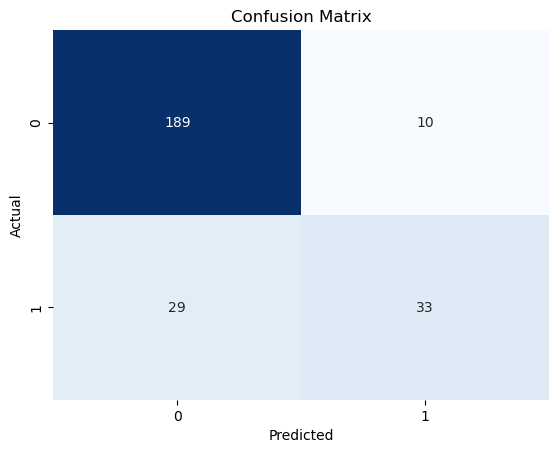

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df['PrecipitationSumInches'] = pd.to_numeric(df['PrecipitationSumInches'], errors='coerce')

# Converting rainfall into binary ----------> (0: no rain, 1: rain)
df['Rain_Indicator'] = (df['PrecipitationSumInches'] > 0).astype(int)


# Features --------> (X) 
X = df[['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent', 'SeaLevelPressureAvgInches', 'WindAvgMPH']]

# target variable (y)
# Binary target ------> rain or no rain
y = df['Rain_Indicator']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --------- Logistic regression model -----------
logistic_model = LogisticRegression()

# --------- Model Training --------- #
logistic_model.fit(X_train, y_train)

# ---------- Predictions ---------- #
y_pred = logistic_model.predict(X_test)

# ---------- Accuracy ----------- #
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# -------------- confusion matrix --------------------
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
